In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Advanced House Prediction/Dataset/test.csv')
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [3]:
dataset.shape

(1459, 80)

In [4]:
feature_with_na=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1]

for feature in feature_with_na:
  print(feature, np.round(dataset[feature].isnull().mean(),4), '%missing value')

MSZoning 0.0027 %missing value
LotFrontage 0.1556 %missing value
Alley 0.9267 %missing value
Utilities 0.0014 %missing value
MasVnrType 0.011 %missing value
MasVnrArea 0.0103 %missing value
BsmtQual 0.0302 %missing value
BsmtCond 0.0308 %missing value
BsmtExposure 0.0302 %missing value
BsmtFinType1 0.0288 %missing value
BsmtFinType2 0.0288 %missing value
BsmtFullBath 0.0014 %missing value
BsmtHalfBath 0.0014 %missing value
Functional 0.0014 %missing value
FireplaceQu 0.5003 %missing value
GarageType 0.0521 %missing value
GarageYrBlt 0.0535 %missing value
GarageFinish 0.0535 %missing value
GarageQual 0.0535 %missing value
GarageCond 0.0535 %missing value
PoolQC 0.9979 %missing value
Fence 0.8012 %missing value
MiscFeature 0.965 %missing value


As we know that the missing value relation with the target columns. These type of relationship had been saw in training dataset.

In [5]:
numerical_feature=[feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Numerical Variable: {}'.format(len(numerical_feature)))

dataset[numerical_feature].head()

Numerical Variable: 37


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,1992.0,2.0,506.0,0,82,0,0,144,0,0,1,2010


In [6]:
year_feature=[feature for feature in numerical_feature if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [7]:
for feature in year_feature:
  print(feature, dataset[feature].unique())

YearBuilt [1961 1958 1997 1998 1992 1993 1990 1970 1999 1971 1975 2009 2005 2003
 2002 2006 2004 1920 1974 2000 2010 1967 1978 1966 1964 1962 1952 1949
 1959 1956 1955 1948 1960 1963 1900 1957 1938 1923 1890 1910 1922 1950
 1925 1939 1940 1942 1936 1930 1915 1912 1917 1907 1968 1977 1927 1947
 1954 1987 1996 1972 1945 1924 1931 1941 1994 1989 1921 1896 1976 2008
 1965 1973 1984 1985 1991 1969 1995 1980 2007 1986 1981 1951 1953 1935
 1902 1946 1934 1983 1880 1979 2001 1916 1918 1988 1937 1905 1928 1926
 1929 1914 1895 1982 1879 1901 1919 1932]
YearRemodAdd [1961 1958 1998 1992 1994 2007 1990 1970 1999 1971 1975 2010 2005 2006
 2004 2002 1950 1993 2000 2003 1967 1978 1966 1964 2001 2008 2009 1959
 1956 1952 1955 1960 1984 1954 1957 1962 1997 1980 1968 1987 1979 1996
 1972 1985 1991 1989 1977 1976 1973 1986 1969 1995 1974 1981 1965 1951
 1953 1963 1982 1988 1983]
GarageYrBlt [1961. 1958. 1997. 1998. 1992. 1993. 1990. 1970. 1999. 1971. 1975. 2009.
 2005. 2003. 2002. 2006. 2004. 1920. 1974.

In [8]:
for feature in year_feature:
  if feature != 'YrSold':
    data=dataset.copy()

    data[feature]=data['YrSold']-data[feature]

data[feature] 

0       2010
1       2010
2       2010
3       2010
4       2010
        ... 
1454    2006
1455    2006
1456    2006
1457    2006
1458    2006
Name: YrSold, Length: 1459, dtype: int64

In [9]:
discrete_feature=[feature for feature in numerical_feature if len(dataset[feature].unique())<25 and feature not in year_feature + ['Id']]

print('Discrete Feature: {}'.format(len(discrete_feature)))

dataset[discrete_feature].head()

Discrete Feature: 16


,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MoSold
0,20,5,6,0,0.0,0.0,1,0,2,1,5,0,1.0,0,0,6
1,20,6,6,0,0.0,0.0,1,1,3,1,6,0,1.0,0,0,6
2,60,5,5,0,0.0,0.0,2,1,3,1,6,1,2.0,0,0,3
3,60,6,6,0,0.0,0.0,2,1,3,1,7,1,2.0,0,0,6
4,120,8,5,0,0.0,0.0,2,0,2,1,5,0,2.0,0,0,1


In [10]:
continous_feature=[feature for feature in numerical_feature if feature not in discrete_feature + year_feature + ['Id']]

print('Continous Feature: {}'.format(len(continous_feature)))

dataset[continous_feature].head()

Continous Feature: 16


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal
0,80.0,11622,0.0,468.0,144.0,270.0,882.0,896,0,896,730.0,140,0,0,120,0
1,81.0,14267,108.0,923.0,0.0,406.0,1329.0,1329,0,1329,312.0,393,36,0,0,12500
2,74.0,13830,0.0,791.0,0.0,137.0,928.0,928,701,1629,482.0,212,34,0,0,0
3,78.0,9978,20.0,602.0,0.0,324.0,926.0,926,678,1604,470.0,360,36,0,0,0
4,43.0,5005,0.0,263.0,0.0,1017.0,1280.0,1280,0,1280,506.0,0,82,0,144,0


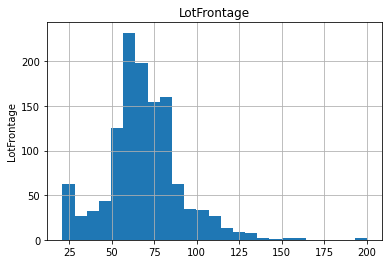

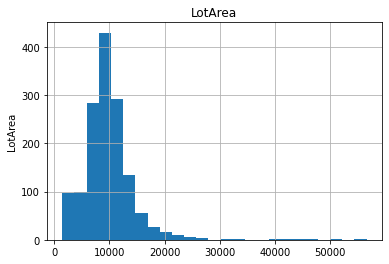

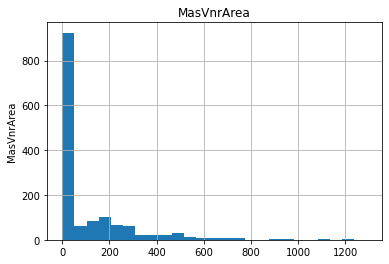

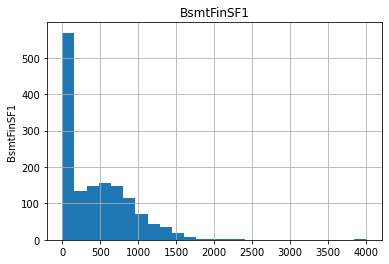

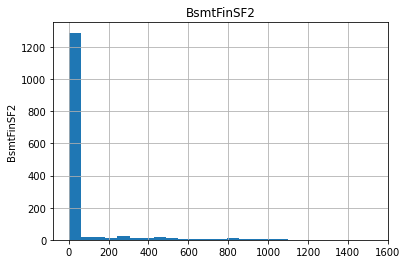

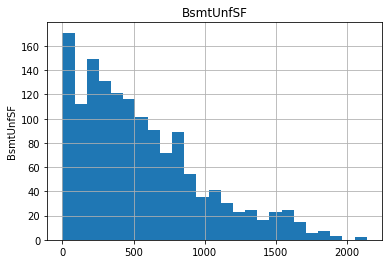

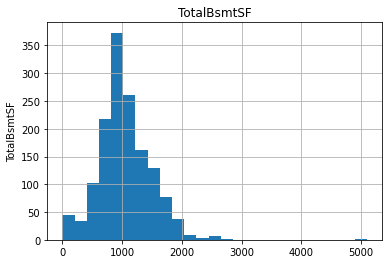

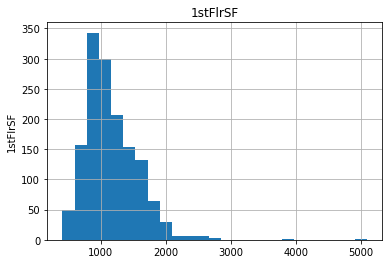

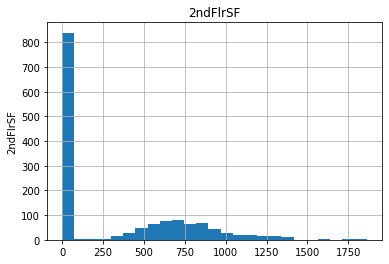

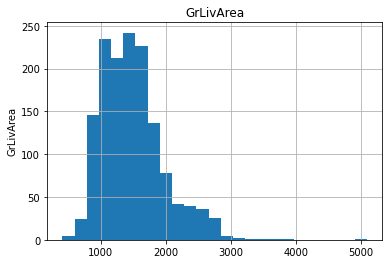

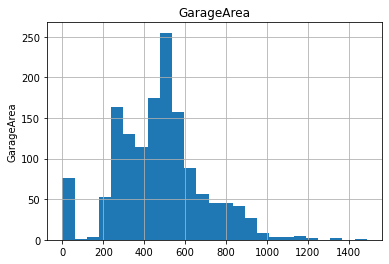

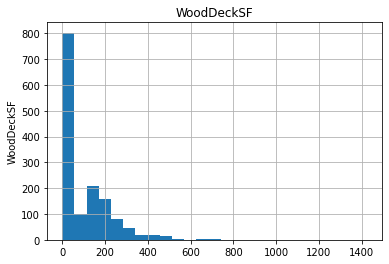

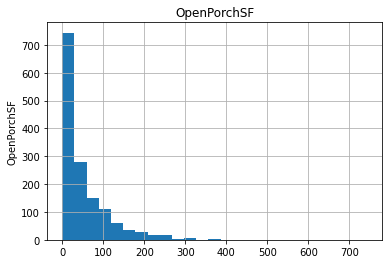

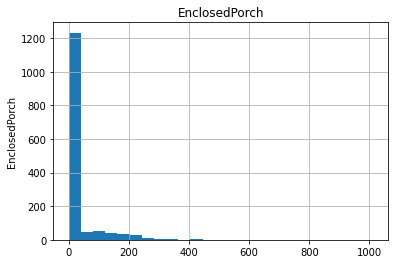

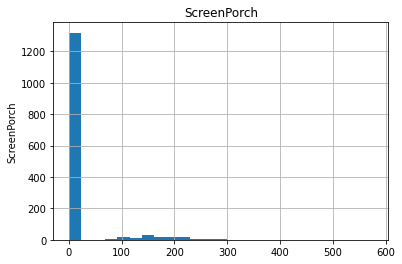

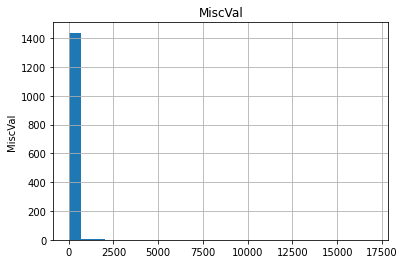

In [11]:
for feature in continous_feature:
  data=dataset.copy()
  data[feature].hist(bins=25)
  plt.ylabel(feature)
  plt.title(feature)
  plt.show()

In [12]:
data[feature].unique()

array([    0, 12500,   500,  1500,   300,   450,    80,   600,   490,
        1200,   650,   400,   900,  2500,   700,   750,  2000,  6500,
        1000,  4500,  3000, 17000,  1512,   455,   460,   420])

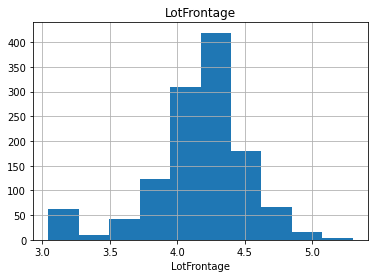

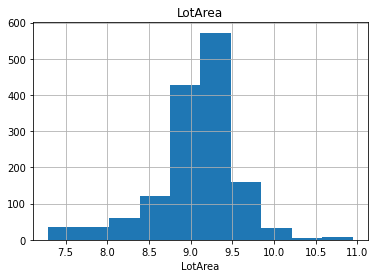

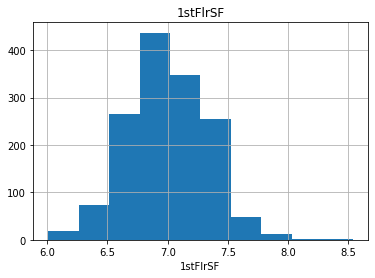

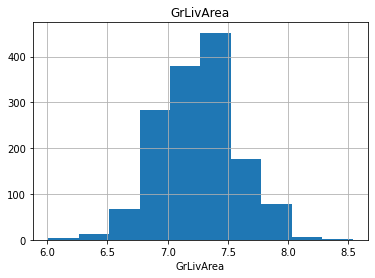

In [13]:
for feature in continous_feature:
  data=dataset.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature]=np.log(data[feature])
    data[feature].hist()
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

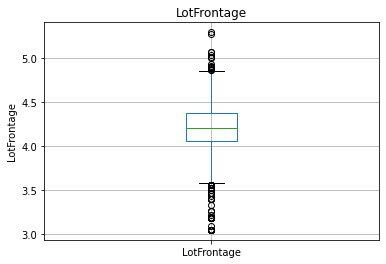

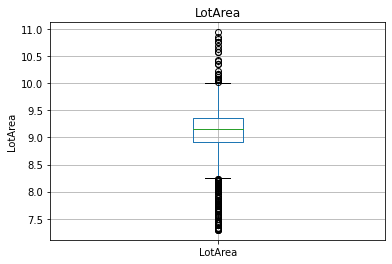

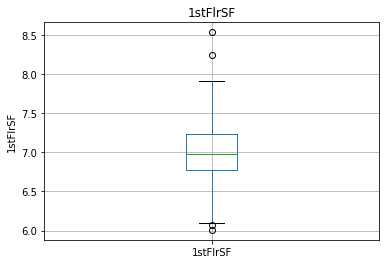

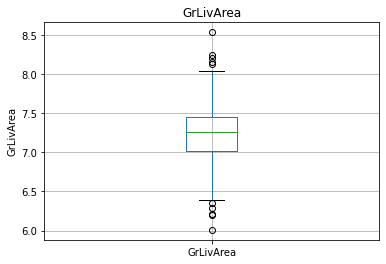

In [14]:
for feature in continous_feature:
  data=dataset.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [15]:
categorical_feature=[feature for feature in dataset.columns if data[feature].dtypes == 'O']

print('Categorical Variable : {}'.format(len(categorical_feature)))

dataset[categorical_feature].head()

Categorical Variable : 43


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,None,Gd,TA,PConc,Gd,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [16]:
for feature in categorical_feature:
  print('The Feature Is {} and number of categories are {}'.format(feature, len(dataset[feature].unique())))

The Feature Is MSZoning and number of categories are 6
The Feature Is Street and number of categories are 2
The Feature Is Alley and number of categories are 3
The Feature Is LotShape and number of categories are 4
The Feature Is LandContour and number of categories are 4
The Feature Is Utilities and number of categories are 2
The Feature Is LotConfig and number of categories are 5
The Feature Is LandSlope and number of categories are 3
The Feature Is Neighborhood and number of categories are 25
The Feature Is Condition1 and number of categories are 9
The Feature Is Condition2 and number of categories are 5
The Feature Is BldgType and number of categories are 5
The Feature Is HouseStyle and number of categories are 7
The Feature Is RoofStyle and number of categories are 6
The Feature Is RoofMatl and number of categories are 4
The Feature Is Exterior1st and number of categories are 14
The Feature Is Exterior2nd and number of categories are 16
The Feature Is MasVnrType and number of cate

In [17]:
feature_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes =='O']

for feature in feature_with_nan:
  print('{} : {} %Missing Value'.format(feature, np.round(dataset[feature].isnull().mean(),4)))

MSZoning : 0.0027 %Missing Value
Alley : 0.9267 %Missing Value
Utilities : 0.0014 %Missing Value
MasVnrType : 0.011 %Missing Value
BsmtQual : 0.0302 %Missing Value
BsmtCond : 0.0308 %Missing Value
BsmtExposure : 0.0302 %Missing Value
BsmtFinType1 : 0.0288 %Missing Value
BsmtFinType2 : 0.0288 %Missing Value
Functional : 0.0014 %Missing Value
FireplaceQu : 0.5003 %Missing Value
GarageType : 0.0521 %Missing Value
GarageFinish : 0.0535 %Missing Value
GarageQual : 0.0535 %Missing Value
GarageCond : 0.0535 %Missing Value
PoolQC : 0.9979 %Missing Value
Fence : 0.8012 %Missing Value
MiscFeature : 0.965 %Missing Value


In [18]:
def replace_cat_feature(dataset, feature_with_nan):
  data=dataset.copy()
  data[feature_with_nan]=data[feature_with_nan].fillna('Missing')
  return data

dataset=replace_cat_feature(dataset, feature_with_nan)

dataset[feature_with_nan].isnull().sum()

MSZoning        0
Alley           0
Utilities       0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [19]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Missing,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,Missing,MnPrv,Missing,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Missing,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,Missing,Missing,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,Missing,MnPrv,Missing,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,Missing,Missing,Missing,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,Missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Missing,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,Missing,Missing,Missing,0,1,2010,WD,Normal


In [20]:
numerical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes != 'O']

for feature in numerical_with_nan:
  print('{} : {} %Missing Value'.format(feature, np.round(dataset[feature].isnull().mean(),4)))

LotFrontage : 0.1556 %Missing Value
MasVnrArea : 0.0103 %Missing Value
BsmtFullBath : 0.0014 %Missing Value
BsmtHalfBath : 0.0014 %Missing Value
GarageYrBlt : 0.0535 %Missing Value


In [21]:
for feature in numerical_with_nan:
  median_value=dataset[feature].median()

  dataset[feature + 'nan'] =np.where(dataset[feature].isnull(),1,0)
  dataset[feature].fillna(median_value,inplace=True)

dataset[numerical_with_nan].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
dtype: int64

In [22]:

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    dataset[feature]=dataset['YrSold']-dataset[feature]

In [23]:
dataset[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,49,49,49.0
1,52,52,52.0
2,13,12,13.0
3,12,12,12.0
4,18,18,18.0


In [24]:
num_feature=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']

for feature in num_feature:
  dataset[feature]=np.log(dataset[feature])

In [25]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,1461,20,RH,4.382027,9.360655,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,49,49,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,...,0,6.797940,0.0,0.0,1,0,2,1,TA,5,Typ,0,Missing,Attchd,49.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,Missing,MnPrv,Missing,0,6,2010,WD,Normal,0,0,0,0,0
1,1462,20,RL,4.394449,9.565704,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,52,52,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,...,0,7.192182,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Missing,Attchd,52.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,Missing,Missing,Gar2,12500,6,2010,WD,Normal,0,0,0,0,0
2,1463,60,RL,4.304065,9.534595,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,13,12,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,...,0,7.395722,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,13.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,Missing,MnPrv,Missing,0,3,2010,WD,Normal,0,0,0,0,0
3,1464,60,RL,4.356709,9.208138,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,12,12,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,...,0,7.380256,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,12.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,Missing,Missing,Missing,0,6,2010,WD,Normal,0,0,0,0,0
4,1465,120,RL,3.761200,8.518193,Pave,Missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,18,18,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,...,0,7.154615,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Missing,Attchd,18.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,Missing,Missing,Missing,0,1,2010,WD,Normal,0,0,0,0,0


In [26]:
categorical_feature=[feature for feature in dataset.columns if dataset[feature].dtypes == 'O']

dataset[categorical_feature].columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [27]:
cols=['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities','LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st','Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual','GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']

for i in cols:
  x=dataset[i].value_counts().to_dict()
  dataset[i]=dataset[i].map(x)

In [28]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,1461,20,10,4.382027,9.360655,1453,1352,934,1311,1457,1081,1396,218,83,1444,1205,745,5,6,49,49,1169,1442,510.0,510.0,878,0.0,892,1256,601,634,1295,951,155,468.0,41,144.0,270.0,882.0,1446,...,0,6.797940,0.0,0.0,1,0,2,1,757.0,5,1357,0,730,853,49.0,625,1.0,730.0,1293,1328,1301,140,0,0,0,120,0,1456,172,1408,0,6,2010,1258.0,1204,0,0,0,0,0
1,1462,20,1114,4.394449,9.565704,1453,1352,484,1311,1457,248,1396,218,1251,1444,1205,745,6,6,52,52,265,1442,205.0,194.0,434,108.0,892,1256,601,634,1295,951,209,923.0,1237,0.0,406.0,1329.0,1446,...,0,7.192182,0.0,0.0,1,1,3,1,565.0,6,1357,0,730,853,52.0,625,1.0,312.0,1293,1328,1301,393,36,0,0,0,0,1456,1169,3,12500,6,2010,1258.0,1204,0,0,0,0,0
2,1463,60,1114,4.304065,9.534595,1453,1352,484,1311,1457,1081,1396,86,1251,1444,1205,427,5,5,13,12,1169,1442,510.0,510.0,878,0.0,892,1256,661,591,1295,951,431,791.0,1237,0.0,137.0,928.0,1446,...,0,7.395722,0.0,0.0,2,1,3,1,757.0,6,1357,1,279,853,13.0,367,2.0,482.0,1293,1328,1301,212,34,0,0,0,0,1456,172,1408,0,3,2010,1258.0,1204,0,0,0,0,0
3,1464,60,1114,4.356709,9.208138,1453,1352,484,1311,1457,1081,1396,86,1251,1444,1205,427,6,6,12,12,1169,1442,510.0,510.0,434,20.0,892,1256,661,634,1295,951,431,602.0,1237,0.0,324.0,926.0,1446,...,0,7.380256,0.0,0.0,2,1,3,1,565.0,7,1357,1,364,853,12.0,367,2.0,470.0,1293,1328,1301,360,36,0,0,0,0,1456,1169,1408,0,6,2010,1258.0,1204,0,0,0,0,0
4,1465,120,1114,3.761200,8.518193,1453,1352,484,70,1457,1081,1396,26,1251,1444,113,745,8,5,18,18,1169,1442,220.0,199.0,878,0.0,491,1256,661,591,1295,951,209,263.0,1237,0.0,1017.0,1280.0,1446,...,0,7.154615,0.0,0.0,2,0,2,1,565.0,5,1357,0,730,853,18.0,389,2.0,506.0,1293,1328,1301,0,82,0,0,144,0,1456,1169,1408,0,1,2010,1258.0,1204,0,0,0,0,0


In [29]:
scaling_feature=[feature for feature in dataset.columns if feature not in ['Id']]

print('Scaling Feature: {}'.format(len(scaling_feature)))

dataset[scaling_feature].head()

Scaling Feature: 84


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,...,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,20,10,4.382027,9.360655,1453,1352,934,1311,1457,1081,1396,218,83,1444,1205,745,5,6,49,49,1169,1442,510.0,510.0,878,0.0,892,1256,601,634,1295,951,155,468.0,41,144.0,270.0,882.0,1446,429,...,0,6.797940,0.0,0.0,1,0,2,1,757.0,5,1357,0,730,853,49.0,625,1.0,730.0,1293,1328,1301,140,0,0,0,120,0,1456,172,1408,0,6,2010,1258.0,1204,0,0,0,0,0
1,20,1114,4.394449,9.565704,1453,1352,484,1311,1457,248,1396,218,1251,1444,1205,745,6,6,52,52,265,1442,205.0,194.0,434,108.0,892,1256,601,634,1295,951,209,923.0,1237,0.0,406.0,1329.0,1446,429,...,0,7.192182,0.0,0.0,1,1,3,1,565.0,6,1357,0,730,853,52.0,625,1.0,312.0,1293,1328,1301,393,36,0,0,0,0,1456,1169,3,12500,6,2010,1258.0,1204,0,0,0,0,0
2,60,1114,4.304065,9.534595,1453,1352,484,1311,1457,1081,1396,86,1251,1444,1205,427,5,5,13,12,1169,1442,510.0,510.0,878,0.0,892,1256,661,591,1295,951,431,791.0,1237,0.0,137.0,928.0,1446,233,...,0,7.395722,0.0,0.0,2,1,3,1,757.0,6,1357,1,279,853,13.0,367,2.0,482.0,1293,1328,1301,212,34,0,0,0,0,1456,172,1408,0,3,2010,1258.0,1204,0,0,0,0,0
3,60,1114,4.356709,9.208138,1453,1352,484,1311,1457,1081,1396,86,1251,1444,1205,427,6,6,12,12,1169,1442,510.0,510.0,434,20.0,892,1256,661,634,1295,951,431,602.0,1237,0.0,324.0,926.0,1446,752,...,0,7.380256,0.0,0.0,2,1,3,1,565.0,7,1357,1,364,853,12.0,367,2.0,470.0,1293,1328,1301,360,36,0,0,0,0,1456,1169,1408,0,6,2010,1258.0,1204,0,0,0,0,0
4,120,1114,3.761200,8.518193,1453,1352,484,70,1457,1081,1396,26,1251,1444,113,745,8,5,18,18,1169,1442,220.0,199.0,878,0.0,491,1256,661,591,1295,951,209,263.0,1237,0.0,1017.0,1280.0,1446,752,...,0,7.154615,0.0,0.0,2,0,2,1,565.0,5,1357,0,730,853,18.0,389,2.0,506.0,1293,1328,1301,0,82,0,0,144,0,1456,1169,1408,0,1,2010,1258.0,1204,0,0,0,0,0


In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[scaling_feature])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [31]:
scaler.transform(dataset[scaling_feature])

array([[0.        , 0.00540541, 0.59344538, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.59895721, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 1.        , 0.55885415, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 1.        , 0.90099208, ..., 0.        , 0.        ,
        0.        ],
       [0.38235294, 1.        , 0.48035069, ..., 0.        , 0.        ,
        1.        ],
       [0.23529412, 1.        , 0.55885415, ..., 0.        , 0.        ,
        0.        ]])

In [34]:
data=pd.concat([dataset['Id'].reset_index(drop=True),
                   pd.DataFrame(scaler.transform(dataset[scaling_feature]),columns=scaling_feature)],axis=1)

data.head(100)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,1461,0.000000,0.005405,0.593445,0.566360,1.0,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,0.063352,1.0,1.000000,1.000000,0.444444,0.625,0.384615,0.822581,1.000000,1.0,1.000000,1.000000,1.000000,0.000000,1.00000,1.000000,0.908953,1.000000,1.000000,1.000000,0.290488,0.116708,0.017256,0.094364,0.126168,0.173111,1.000000,...,0.0,0.312253,0.000000,0.0,0.25,0.0,0.333333,0.5,1.000000,0.166667,1.000000,0.00,1.000000,1.000000,0.792994,1.000000,0.2,0.490591,1.000000,1.000000,1.000000,0.098315,0.000000,0.000000,0.0,0.208333,0.0,1.0,0.146404,1.000000,0.000000,0.454545,1.0,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0
1,1462,0.000000,1.000000,0.598957,0.622527,1.0,1.0,0.515086,1.000000,1.0,0.222222,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.555556,0.625,0.407692,0.870968,0.224700,1.0,0.400786,0.379175,0.488479,0.083721,1.00000,1.000000,0.908953,1.000000,1.000000,1.000000,0.429306,0.230175,1.000000,0.000000,0.189720,0.260844,1.000000,...,0.0,0.468253,0.000000,0.0,0.25,0.5,0.500000,0.5,0.735537,0.250000,1.000000,0.00,1.000000,1.000000,0.802548,1.000000,0.2,0.209677,1.000000,1.000000,1.000000,0.275983,0.048518,0.000000,0.0,0.000000,0.0,1.0,1.000000,0.000711,0.735294,0.454545,1.0,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0
2,1463,0.235294,1.000000,0.558854,0.614005,1.0,1.0,0.515086,1.000000,1.0,1.000000,1.000000,0.371429,1.000000,1.0,1.000000,0.570270,0.444444,0.500,0.107692,0.225806,1.000000,1.0,1.000000,1.000000,1.000000,0.000000,1.00000,1.000000,1.000000,0.927119,1.000000,1.000000,1.000000,0.197257,1.000000,0.000000,0.064019,0.182139,1.000000,...,0.0,0.548792,0.000000,0.0,0.50,0.5,0.500000,0.5,1.000000,0.250000,1.000000,0.25,0.365682,1.000000,0.678344,0.528336,0.4,0.323925,1.000000,1.000000,1.000000,0.148876,0.045822,0.000000,0.0,0.000000,0.0,1.0,0.146404,1.000000,0.000000,0.181818,1.0,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0
3,1464,0.235294,1.000000,0.582212,0.524583,1.0,1.0,0.515086,1.000000,1.0,1.000000,1.000000,0.371429,1.000000,1.0,1.000000,0.570270,0.555556,0.625,0.100000,0.225806,1.000000,1.0,1.000000,1.000000,0.488479,0.015504,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.150125,1.000000,0.000000,0.151402,0.181747,1.000000,...,0.0,0.542672,0.000000,0.0,0.50,0.5,0.500000,0.5,0.735537,0.333333,1.000000,0.25,0.485232,1.000000,0.675159,0.528336,0.4,0.315860,1.000000,1.000000,1.000000,0.252809,0.048518,0.000000,0.0,0.000000,0.0,1.0,1.000000,1.000000,0.000000,0.454545,1.0,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0
4,1465,0.588235,1.000000,0.317987,0.335596,1.0,1.0,0.515086,0.035742,1.0,1.000000,1.000000,0.085714,1.000000,1.0,0.069847,1.000000,0.777778,0.500,0.146154,0.322581,1.000000,1.0,0.430255,0.388998,1.000000,0.000000,0.53961,1.000000,1.000000,0.927119,1.000000,1.000000,0.429306,0.065586,1.000000,0.000000,0.475234,0.251227,1.000000,...,0.0,0.453388,0.000000,0.0,0.50,0.0,0.333333,0.5,0.735537,0.166667,1.000000,0.00,1.000000,1.000000,0.694268,0.568556,0.4,0.340054,1.000000,1.000000,1.000000,0.000000,0.110512,0.000000,0.0,0.250000,0.0,1.0,1.000000,1.000000,0.000000,0.000000,1.0,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,.

In [33]:
## data.to_csv('/content/drive/MyDrive/Colab Notebooks/Advanced House Prediction/Dataset/Final Test.csv')